In [1]:
import torch
import matplotlib.pyplot as plt
from src.diffusion import DiffusionModel
from src.toy_dataset import image_to_toy_dataset

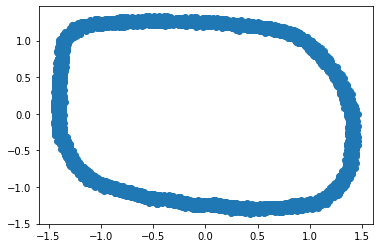

In [2]:
data = image_to_toy_dataset("images/img3.png", 15000, blur_radius=4)
data = (data - data.mean(axis=0)) / data.std(axis=0)
plt.scatter(data[:,0], data[:,1])

## Diffusion exemple

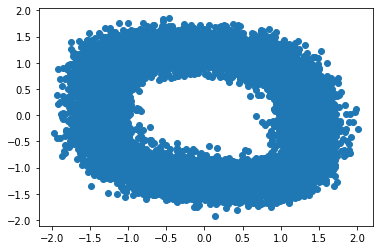

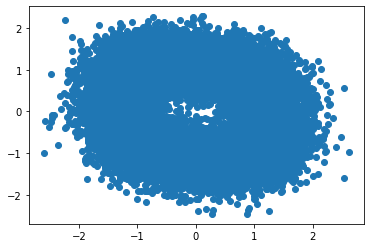

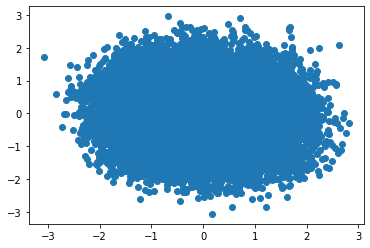

In [3]:
diffuser = DiffusionModel(torch.Tensor([]), 100, 0.00001, 0.008, "cpu")
for i in range(1,4):
    diffused = diffuser.diffuse(torch.Tensor(data), i*30)[1].numpy()
    plt.scatter(diffused[:,0], diffused[:,1])
    plt.show()

## Diffusion model training

In [12]:
from src.training import train

batch_size = 1024
n_epochs = 100
n_steps = 100
lr = 0.001
device = "cuda"

diffuser, all_losses = train(data, batch_size, n_epochs, n_steps, lr, device)

100%|██████████| 100/100 [00:37<00:00,  2.66it/s]


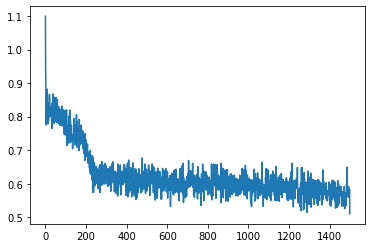

In [6]:
plt.plot(all_losses)

## Denoising random distribution

In [7]:
#eval_data = (torch.rand(512,2)-0.5) * 2
eval_data = torch.randn(512,2)

diffuser.model.eval()
with torch.no_grad():
    batch = torch.Tensor(eval_data)
    output, all_outputs = diffuser.denoise(torch.Tensor(eval_data).to(device), n_steps)

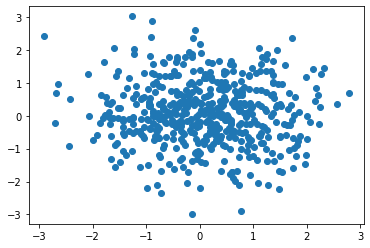

In [8]:
plt.scatter(batch.numpy()[:,0], batch.numpy()[:,1])

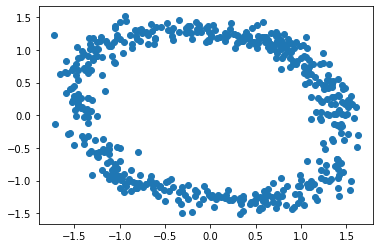

In [9]:
plt.scatter(output.cpu().numpy()[:,0], output.cpu().numpy()[:,1])

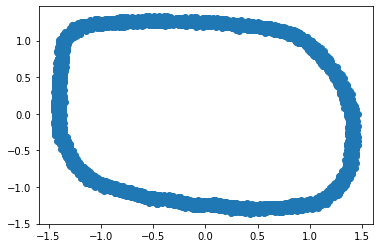

In [10]:
plt.scatter(data[:,0], data[:,1])

## Denoising other distribution from image file

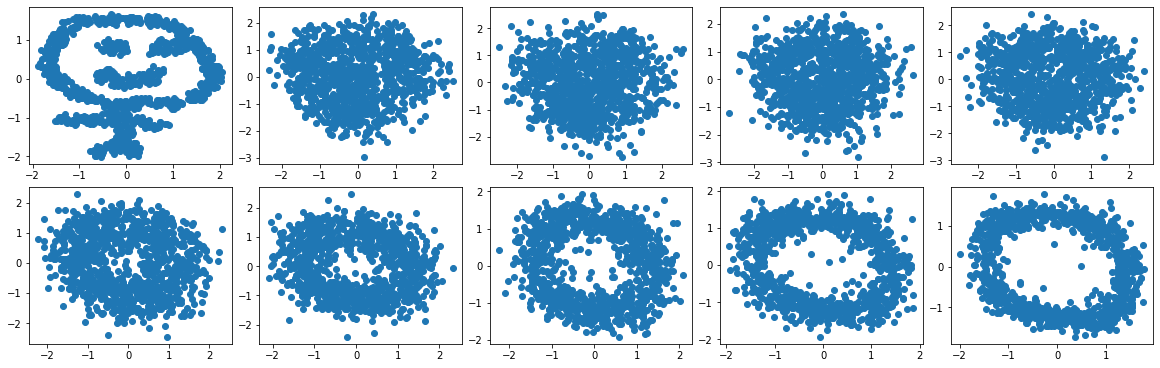

In [11]:
data2 = image_to_toy_dataset("images/img.png", 1024, blur_radius=4)
data2 = (data2 - data2.mean(axis=0)) / data2.std(axis=0)

diffuser.model.eval()
outputs = []
with torch.no_grad():
    _, all_outputs = diffuser.denoise(torch.Tensor(data2).to(device), n_steps)

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(16, 5),
                        constrained_layout=True)
axs = axs.flatten()
k = 0
n_plots = 10
for i, output in enumerate(all_outputs):
    if i % 10 ==0:
        if k < n_plots:
            axs[k].scatter(output.cpu().numpy()[:,0], output.cpu().numpy()[:,1])
            k += 1
plt.show()